## A.)  Plot the mapping function for and . Also plot 100--200 iterates of a typical
initial point in function of time (number of iterations) for both parameter values. Do they
look like chaotic processes?

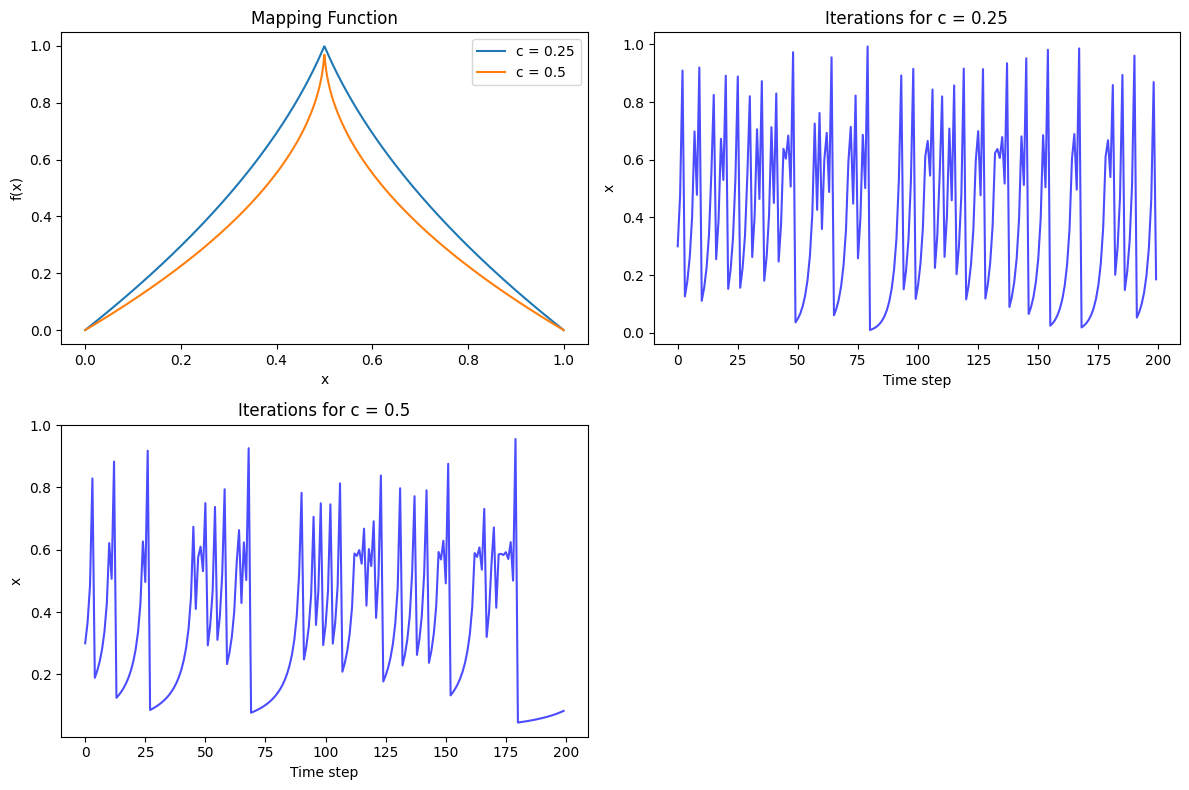

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, c):
    """Curved tent map function"""
    return (1 + 2*c - np.sqrt((1 - 2*c)**2 + 8*c*np.abs(1 - 2*x))) / (4*c)

def plot_mapping_and_iterations():
    c_values = [0.25, 0.5]
    x = np.linspace(0, 1, 1000)
    
    plt.figure(figsize=(12, 8))
    
    # Plot mapping functions
    plt.subplot(2, 2, 1)
    for c in c_values:
        plt.plot(x, f(x, c), label=f'c = {c}')
    plt.title('Mapping Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    
    # Plot iterations
    n_iter = 200
    x0 = 0.3
    
    for i, c in enumerate(c_values):
        plt.subplot(2, 2, 2+i)
        trajectory = [x0]
        for _ in range(n_iter-1):
            trajectory.append(f(trajectory[-1], c))
        
        plt.plot(range(n_iter), trajectory, 'b-', alpha=0.7)
        plt.title(f'Iterations for c = {c}')
        plt.xlabel('Time step')
        plt.ylabel('x')
    
    plt.tight_layout()
    plt.show()

plot_mapping_and_iterations()

## C.)

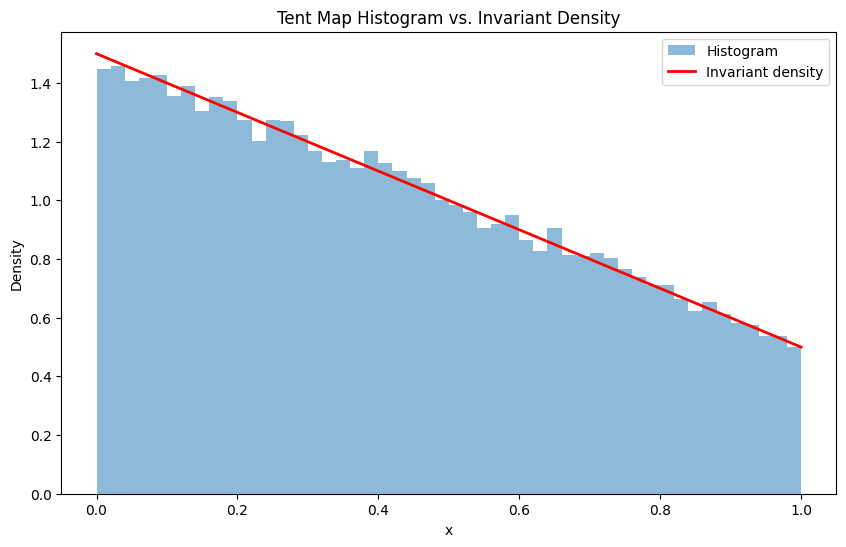

In [19]:
def invariant_dens(x, c):
    return 1 + 2*c - 4*c*x

N = 100000
c = 0.25  # Olyan c-t válassz, ahol a fenti f(x, c) valós értéket ad!
x = np.random.rand()

x_values = []
for _ in range(N):
    x = f(x, c)
    if np.isreal(x) and 0 <= x <= 1:
        x_values.append(x)

plt.figure(figsize=(10, 6))
plt.hist(x_values, bins=50, density=True, alpha=0.5, label='Histogram')

x_grid = np.linspace(0, 1, 500)
plt.plot(x_grid, invariant_dens(x_grid, c), 'r-', lw=2, label='Invariant density')

plt.title('Tent Map Histogram vs. Invariant Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

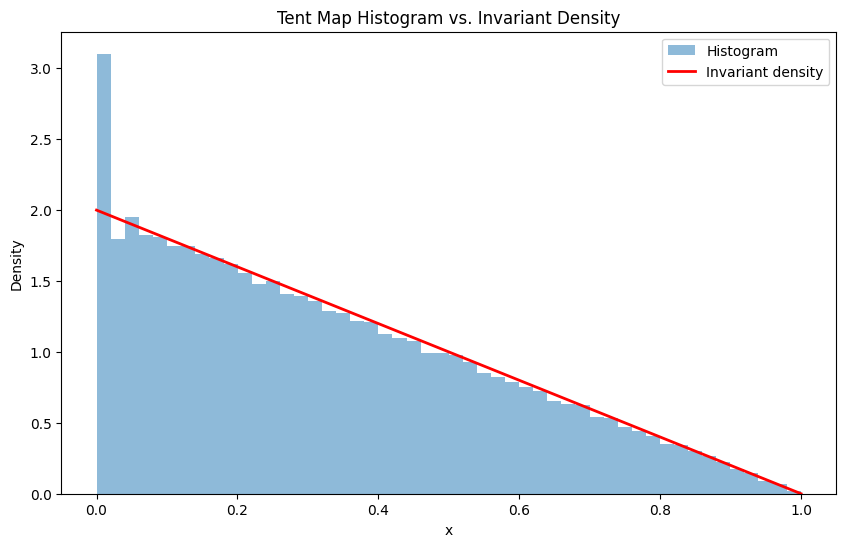

In [22]:
N = 100000
c = 0.5  # Olyan c-t válassz, ahol a fenti f(x, c) valós értéket ad!
x = np.random.rand()

x_values = []
for _ in range(N):
    x = f(x, c)
    if np.isreal(x) and 0 <= x <= 1:
        x_values.append(x)

plt.figure(figsize=(10, 6))
plt.hist(x_values, bins=50, density=True, alpha=0.5, label='Histogram')

x_grid = np.linspace(0, 1, 500)
plt.plot(x_grid, invariant_dens(x_grid, c), 'r-', lw=2, label='Invariant density')

plt.title('Tent Map Histogram vs. Invariant Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

# D:

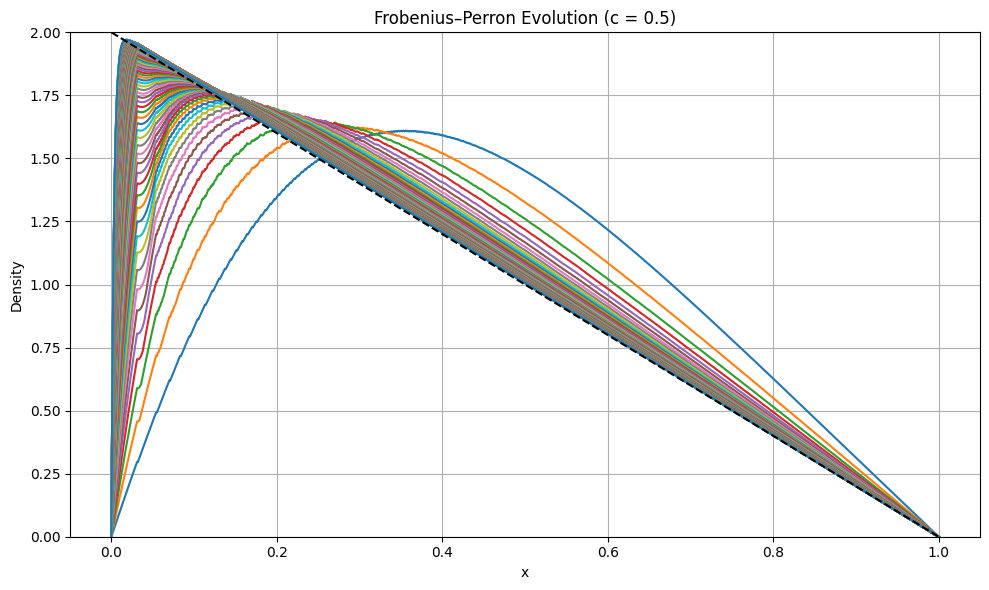

/tmp/ipykernel_98925/68934684.py:88: RuntimeWarning: overflow encountered in exp
  return c + a * np.exp(-b * x)
/tmp/ipykernel_98925/68934684.py:88: RuntimeWarning: overflow encountered in multiply
  return c + a * np.exp(-b * x)


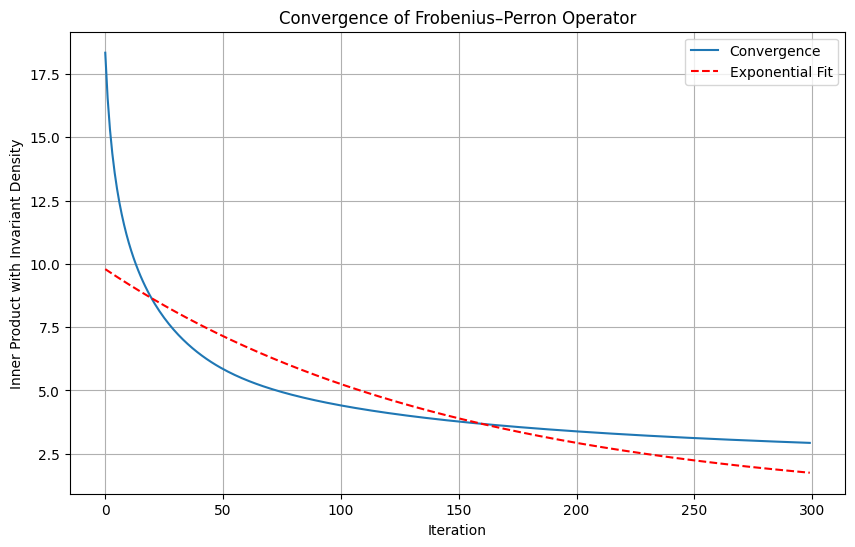

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Inverse branches
def f_invL(x, c):
    return (c + 0.5) * x - c * x**2

def f_invR(x, c):
    return 1 - (c + 0.5) * x + c * x**2

# Derivatives of inverse branches
def df_invL(x, c):
    return (c + 0.5) - 2 * c * x

def df_invR(x, c):
    return -((c + 0.5) - 2 * c * x)

def fp_operator_discrete(p, x_grid, c):
    """Frobenius–Perron operator using grid evaluation and inverse branch derivatives."""
    new_p = np.zeros_like(p)
    dx = x_grid[1] - x_grid[0]

    for i, x in enumerate(x_grid):
        # Preimages under left and right branches
        yL = f_invL(x, c)
        yR = f_invR(x, c)

        if 0 <= yL <= 1:
            jL = int(round(yL / dx))
            jL = min(max(jL, 0), len(x_grid) - 1)
            inv_deriv_L = df_invL(x, c)
            if inv_deriv_L != 0:
                new_p[i] += p[jL] * np.abs(inv_deriv_L)

        if 0 <= yR <= 1:
            jR = int(round(yR / dx))
            jR = min(max(jR, 0), len(x_grid) - 1)
            inv_deriv_R = df_invR(x, c)
            if inv_deriv_R != 0:
                new_p[i] += p[jR] * np.abs(inv_deriv_R)

    return new_p

# Setup
N = 1000
x_grid = np.linspace(0, 1, N)
dx = x_grid[1] - x_grid[0]
c = 0.5  # Can be changed

# Initial density: uniform
p = np.sin(np.pi * x_grid)  # Example: sine function

# Plotting setup
n_iter = 300
plt.figure(figsize=(10, 6))

# Plot analytical invariant density for comparison
analitical_density = invariant_dens(x_grid, c)

convergence = []

for k in range(n_iter):
    p = fp_operator_discrete(p, x_grid, c)
    p /= np.sum(p * dx)  # Normalize
    
    if k % round(2) == 0 or k == n_iter - 1:
        plt.plot(x_grid, p, label=f"Iter {k+1}")
    convergence.append(np.linalg.norm(p - analitical_density))



plt.plot(x_grid, analitical_density, 'k--', label="Exact: $1 + 2c - 4c x$")
plt.xlabel("x")
plt.ylabel("Density")
plt.title(f"Frobenius–Perron Evolution (c = {c})")
plt.grid(True)
plt.ylim(0, 1 + 2*c )
plt.tight_layout()
plt.show()
 

plt.figure(figsize=(10, 6))
plt.plot(range(n_iter), convergence, label="Convergence")

#exponential fit
from scipy.optimize import curve_fit
def exp_fit(x, a, b):
    return c + a * np.exp(-b * x)
popt, _ = curve_fit(exp_fit, range(n_iter), convergence)
plt.plot(range(n_iter), exp_fit(range(n_iter), *popt), 'r--', label="Exponential Fit")
plt.legend()

plt.xlabel("Iteration")
plt.ylabel("Inner Product with Invariant Density")
plt.title("Convergence of Frobenius–Perron Operator")
plt.grid(True) 



In [ ]:
convergence.append(np.linalg.norm(p - analitical_density))